In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results = {
    "CPU": "results-cpu.csv",
    "GPU": "results-t4.csv",
}

In [3]:
dfs = []
for benchmark, filename in results.items():
    df = pd.read_csv(filename)
    df["Benchmark"] = benchmark
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df.dtypes

model                    object
prompt                   object
created_at               object
total_duration          float64
load_duration           float64
eval_duration           float64
eval_rate               float64
prompt_eval_duration    float64
prompt_eval_rate        float64
Benchmark                object
dtype: object

In [4]:
unpiv_df = pd.melt(
    df,
    id_vars=["Benchmark", "model"],
    value_vars=["eval_rate", "load_duration"],
    var_name="metric",
)

## Load Time Analysis

In [5]:
# Average load time by benchmark
unpiv_df[unpiv_df["metric"] == "load_duration"].groupby("Benchmark")["value"].mean()

Benchmark
CPU    2.526440
GPU    3.948965
Name: value, dtype: float64

In [6]:
# Average load time by model
unpiv_df[unpiv_df["metric"] == "load_duration"].groupby("model")["value"].mean()

model
deepseek-r1:14b     3.649207
gemma3:12b          4.253947
llama3.1:8b         3.009447
mistral-nemo:12b    3.460733
Name: value, dtype: float64

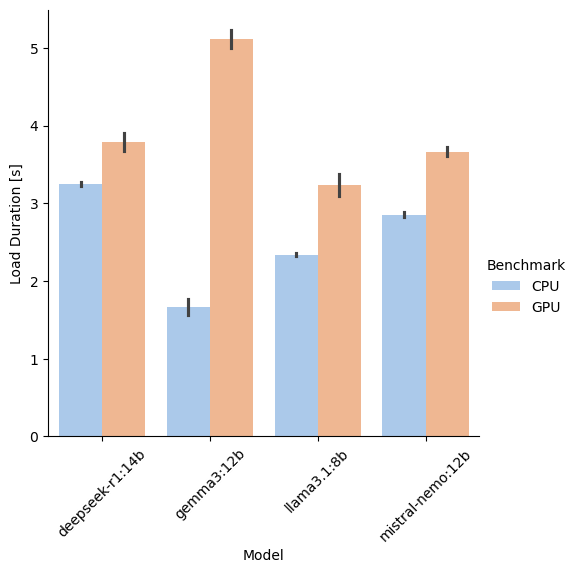

In [7]:
sns.catplot(
    data=unpiv_df[unpiv_df["metric"] == "load_duration"],
    kind="bar",
    x="model",
    y="value",
    hue="Benchmark",
    errorbar="sd",
    palette="pastel",
)
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Load Duration [s]")
plt.show()

## Eval Rate [token/s] Analysis

In [8]:
# Average token/s by benchmark
unpiv_df[unpiv_df["metric"] == "eval_rate"].groupby("Benchmark")["value"].mean()

Benchmark
CPU     5.151498
GPU    21.856577
Name: value, dtype: float64

In [9]:
# Average token/s by model
unpiv_df[unpiv_df["metric"] == "eval_rate"].groupby("model")["value"].mean()

model
deepseek-r1:14b     12.883472
gemma3:12b          14.281170
llama3.1:8b         24.146549
mistral-nemo:12b    19.410036
Name: value, dtype: float64

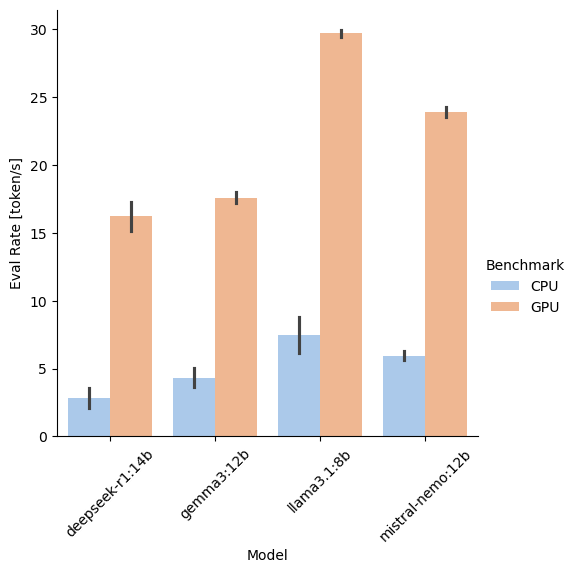

In [10]:
sns.catplot(
    data=unpiv_df[unpiv_df["metric"] == "eval_rate"],
    kind="bar",
    x="model",
    y="value",
    hue="Benchmark",
    errorbar="sd",
    palette="pastel",
)
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Eval Rate [token/s]")
plt.show()